In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

In [4]:
df = pd.read_csv("../data/processed/processed_data.csv")
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [7]:
X = df.drop('class', axis=1)

# Scaling and PCA for visualization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [9]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = pca.fit_transform(X_scaled)

In [10]:
reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


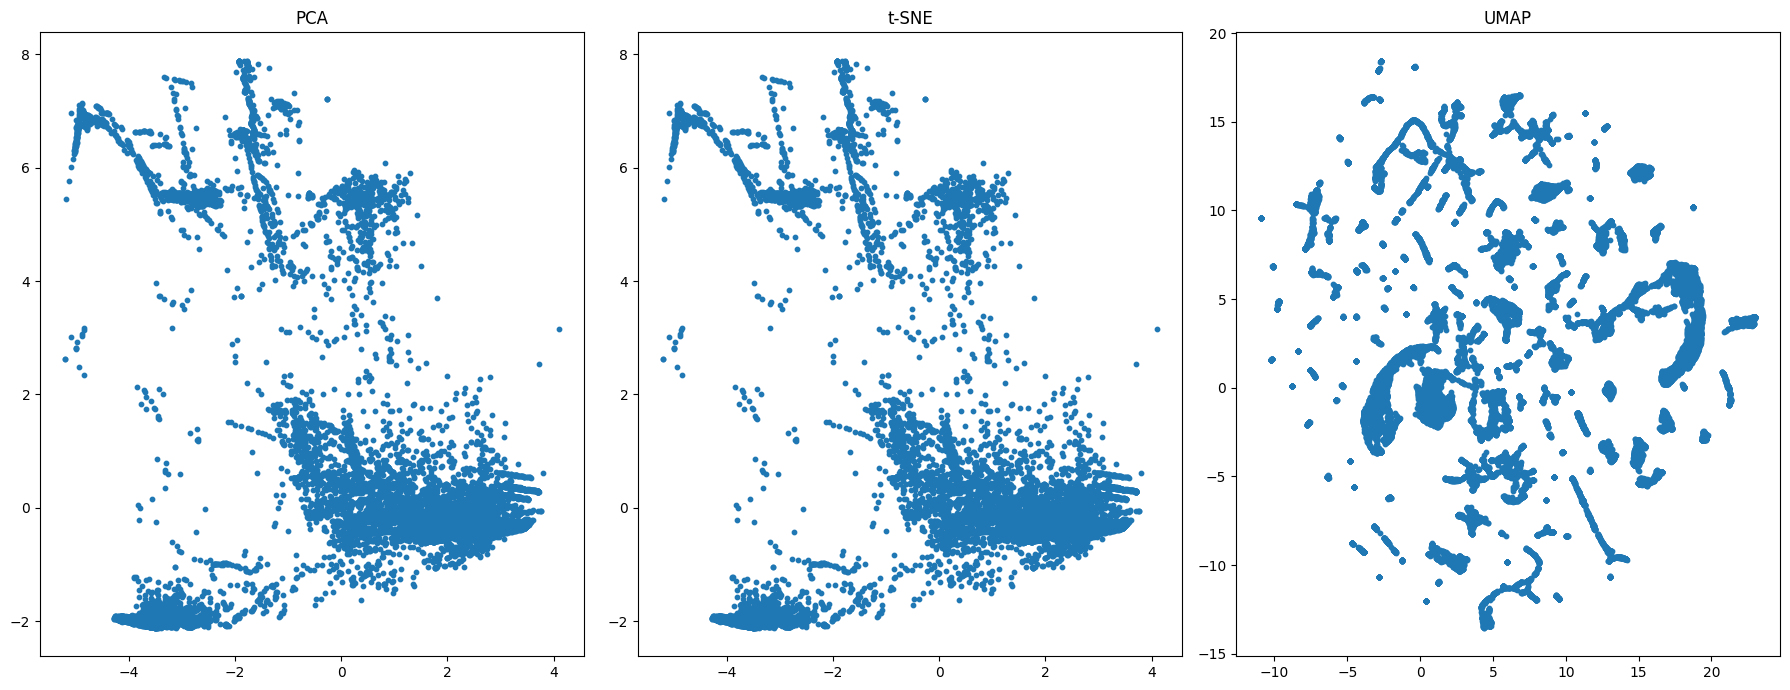

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18, 7))
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], s=10)
axes[0].set_title('PCA')

axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], s=10)
axes[1].set_title('t-SNE')

axes[2].scatter(X_umap[:, 0], X_umap[:, 1], s=10)
axes[2].set_title('UMAP')

plt.tight_layout()
plt.show()